# Feature Selection

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from matplotlib_venn import venn3, venn2

## Load various datasets

Load Stoich45 feature dataset

In [2]:
df_stoich45 = pd.read_csv('relaxed_structures_fingerprints/stoich45_fingerprints.csv', sep=',')
df_stoich45

,MOF,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,density_mean,density_geometric_mean,density_standard_deviation,density_max,density_min,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min
0,qmof-0000295,4.840000,2.833720,5.689851,29.0,1.0,7.960000,3.991657,6.749696,16.0,...,991.514712,4.182460,1912.665927,8960.0,0.0899,1233.652000,1223.402105,146.933016,1402.3,745.5
1,qmof-00019ff,6.160494,3.696834,7.475816,35.0,1.0,9.790123,5.722078,6.461120,17.0,...,1268.620262,23.314272,1455.767729,8900.0,0.0899,1205.481481,1198.057939,131.447336,1402.3,760.4
2,qmof-0001b0d,4.982301,3.323008,4.774531,30.0,1.0,9.318584,5.295894,6.452365,16.0,...,1285.340051,21.643255,1546.598997,8900.0,0.0899,1193.978761,1186.951791,126.964974,1402.3,760.4
3,qmof-0003ae4,5.125000,3.915946,2.847696,8.0,1.0,9.875000,5.471130,6.918047,16.0,...,632.433350,9.465604,955.356975,2260.0,0.0899,1157.362500,1115.508932,259.170918,1313.9,520.2
4,qmof-000512e,7.400000,6.724170,3.088689,19.0,1.0,13.700000,11.500180,4.313931,16.0,...,721.626295,15.205775,1023.803409,2260.0,0.0899,1218.510000,1187.405501,219.174061,1402.3,418.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-fff0df1,4.852941,3.061308,5.047611,29.0,1.0,8.676471,4.605269,6.676211,16.0,...,1094.694428,8.472108,1743.749437,8960.0,0.0899,1216.669118,1207.703553,139.305687,1402.3,745.5
20370,qmof-fff4e91,5.652174,3.627508,5.857798,30.0,1.0,9.739130,5.683942,6.441829,16.0,...,1293.323270,19.449685,1662.683156,7140.0,0.0899,1196.652174,1189.732816,126.320937,1313.9,906.4
20371,qmof-fffa2d9,9.214286,5.231450,10.631346,56.0,1.0,11.000000,6.622890,6.881653,17.0,...,610.714507,4.941293,1077.738281,3510.0,0.0899,1222.228571,1205.732522,164.349362,1313.9,502.9
20372,qmof-fffd0e2,6.423077,3.917995,7.150433,35.0,1.0,10.000000,6.002496,6.330634,17.0,...,1291.114698,21.226806,1625.387651,7140.0,0.0899,1209.240385,1201.115960,138.735819,1402.3,906.4


Load Sine Coloumb Matrix features

In [3]:
df_scm = pd.read_csv('relaxed_structures_fingerprints/sine_matrix_fingerprints.csv', sep=',')
df_scm

,MOF,sine coulomb matrix eig 0,sine coulomb matrix eig 1,sine coulomb matrix eig 2,sine coulomb matrix eig 3,sine coulomb matrix eig 4,sine coulomb matrix eig 5,sine coulomb matrix eig 6,sine coulomb matrix eig 7,sine coulomb matrix eig 8,...,sine coulomb matrix eig 490,sine coulomb matrix eig 491,sine coulomb matrix eig 492,sine coulomb matrix eig 493,sine coulomb matrix eig 494,sine coulomb matrix eig 495,sine coulomb matrix eig 496,sine coulomb matrix eig 497,sine coulomb matrix eig 498,sine coulomb matrix eig 499
0,qmof-0000295,1691.427298,1560.244952,137.059900,85.726398,76.930876,74.818457,66.357818,63.019537,60.947984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,qmof-00019ff,2907.030536,1364.645982,2521.150564,2370.534598,2383.323768,179.706962,93.568952,91.120197,89.876367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,qmof-0001b0d,1802.469471,1732.081967,1363.264016,178.118907,97.352536,94.760572,89.695991,87.103939,83.213032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,qmof-0003ae4,139.946646,83.478306,80.230482,75.994663,74.484638,71.567389,69.691548,68.374646,66.877563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,qmof-000512e,617.233971,564.388755,165.979086,0.404738,0.325928,91.008065,86.933901,80.051556,79.421213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-fff0df1,1796.478044,1694.734871,1506.136068,1514.231978,212.086602,121.172004,108.586065,107.346230,100.464696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20370,qmof-fff4e91,1856.582131,1663.730055,142.494828,84.710420,79.326007,77.989694,69.592844,66.939837,67.815411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20371,qmof-fffa2d9,8063.154322,7646.379145,677.055769,492.110722,478.782339,473.324184,390.052595,397.342907,399.979903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20372,qmof-fffd0e2,2654.146627,2482.868806,2021.273651,1790.679016,1648.558929,1613.124911,504.693455,440.876141,448.233202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Load OFM features

In [4]:
df_ofm = pd.read_csv('relaxed_structures_fingerprints/ofm_fingerprints.csv', sep=',')
df_ofm

,MOF,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^1,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^5,OFM: s^1 - p^6,OFM: s^1 - d^1,...,OFM: period 7 - f^12,OFM: period 7 - f^13,OFM: period 7 - f^14,OFM: period 7 - period 1,OFM: period 7 - period 2,OFM: period 7 - period 3,OFM: period 7 - period 4,OFM: period 7 - period 5,OFM: period 7 - period 6,OFM: period 7 - period 7
0,qmof-0000295,0.223047,0.332186,0.0,0.209774,0.060009,0.056113,0.000000,0.006290,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,qmof-00019ff,0.087862,0.237401,0.0,0.192361,0.011615,0.020126,0.013176,0.000123,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,qmof-0001b0d,0.100316,0.237686,0.0,0.210023,0.001645,0.025161,0.000000,0.000857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,qmof-0003ae4,0.050872,0.314352,0.0,0.079292,0.000000,0.235060,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,qmof-000512e,0.000733,0.085154,0.0,0.003905,0.004421,0.076828,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-fff0df1,0.181779,0.293623,0.0,0.221468,0.016555,0.052176,0.000000,0.003425,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20370,qmof-fff4e91,0.136050,0.223271,0.0,0.198331,0.000000,0.024940,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20371,qmof-fffa2d9,0.057634,0.243963,0.0,0.073384,0.000000,0.122300,0.047825,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20372,qmof-fffd0e2,0.090614,0.206402,0.0,0.177845,0.006249,0.000000,0.020183,0.002125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Load Stoich120 features

In [5]:
df_stoich120 = pd.read_csv('relaxed_structures_fingerprints/stoich120_fingerprints.csv', sep=',')
df_stoich120

,MOF,H fraction,He fraction,Li fraction,Be fraction,B fraction,C fraction,N fraction,O fraction,F fraction,...,range Electronegativity,mean Electronegativity,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,qmof-0000295,0.480000,0,0.000,0.0,0.0,0.280000,0.080000,0.120000,0.000000,...,1.54,2.502000,1.480000,1.280000,0.400000,0.0,0.468354,0.405063,0.126582,0.0
1,qmof-00019ff,0.345679,0,0.000,0.0,0.0,0.444444,0.098765,0.049383,0.000000,...,1.56,2.533333,1.654321,1.629630,0.580247,0.0,0.428115,0.421725,0.150160,0.0
2,qmof-0001b0d,0.371681,0,0.000,0.0,0.0,0.477876,0.017699,0.106195,0.000000,...,1.79,2.501239,1.628319,1.433628,0.238938,0.0,0.493298,0.434316,0.072386,0.0
3,qmof-0003ae4,0.250000,0,0.125,0.0,0.0,0.250000,0.000000,0.375000,0.000000,...,2.46,2.600000,1.625000,2.000000,0.000000,0.0,0.448276,0.551724,0.000000,0.0
4,qmof-000512e,0.050000,0,0.000,0.0,0.0,0.300000,0.200000,0.400000,0.000000,...,2.62,2.900000,1.900000,2.800000,0.000000,0.0,0.404255,0.595745,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-fff0df1,0.426471,0,0.000,0.0,0.0,0.367647,0.044118,0.132353,0.000000,...,1.54,2.521029,1.544118,1.397059,0.294118,0.0,0.477273,0.431818,0.090909,0.0
20370,qmof-fff4e91,0.347826,0,0.000,0.0,0.0,0.434783,0.000000,0.173913,0.000000,...,1.79,2.543913,1.652174,1.565217,0.434783,0.0,0.452381,0.428571,0.119048,0.0
20371,qmof-fffa2d9,0.285714,0,0.000,0.0,0.0,0.214286,0.000000,0.250000,0.000000,...,2.55,2.743929,1.714286,2.500000,0.000000,0.0,0.406780,0.593220,0.000000,0.0
20372,qmof-fffd0e2,0.326923,0,0.000,0.0,0.0,0.423077,0.153846,0.000000,0.000000,...,1.51,2.507692,1.673077,1.596154,0.576923,0.0,0.435000,0.415000,0.150000,0.0


### Load the processed dataset for HSE06 DFT level

In [6]:
df_hse06 = pd.read_csv('train_hse06.csv', sep=',')
df_hse06

,inputs.hse06.theory,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume,qmof_id
0,HSE06,4.988289,['[Zn]'],"['[O-]C(=O)C', 'n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...",[O-]C(=O)C.[Zn].n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...,78,1.37489,2.13029,1.693758,822.916880,qmof-755b963
1,HSE06,3.196302,['[Zn]'],['c1ncn(c1)Cc1ccc(cc1)Cn1cncc1'],[Zn].c1ncn(c1)Cc1ccc(cc1)Cn1cncc1,134,1.20752,2.66721,1.453964,1409.227968,qmof-431c61c
2,HSE06,3.617418,['[OH2][Pr][OH2]'],['[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C...,[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C(=...,134,1.20601,2.81754,1.683856,1450.490082,qmof-0954b37
3,HSE06,3.220291,['Cl[Cu]Cl'],['Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F'],Cl[Cu]Cl.Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F,35,3.04146,3.91264,1.469086,568.352244,qmof-6994eb7
4,HSE06,2.436139,['[Ag]'],['n1ccc(cc1)c1ccncc1'],[Ag].n1ccc(cc1)c1ccncc1,104,1.22817,2.05442,1.729977,935.476068,qmof-1eea8fc
...,...,...,...,...,...,...,...,...,...,...,...
8643,HSE06,3.605205,"['[Fe]', '[Ni]']",['[C]#N'],[C]#N.[Fe].[Ni],36,0.75723,1.76057,1.851188,364.937932,qmof-46a3716
8644,HSE06,3.776886,['[Cu]'],['[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O'],[Cu].[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O,86,0.84395,2.34244,1.839557,866.228574,qmof-b2fb769
8645,HSE06,3.880014,['[Mn]'],['[N][N][N]'],[Mn].[N][N][N],70,0.83223,1.52142,1.814356,752.692981,qmof-4a920a2
8646,HSE06,4.301264,['[OH2][Ca][OH2]'],['CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-]'],CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-].[OH2][Ca][OH2],94,1.34620,2.28803,1.639434,896.172985,qmof-0f4d4bb


In [7]:
# Available set of features 

print('Total number of features in stoich45:', len(df_stoich45.columns))
print('Total number of features in sine matrix:', len(df_scm.columns))
print('Total number of features in OFM:', len(df_ofm.columns))
print('Total number of features in stoich120:', len(df_stoich120.columns))
# HSE06 features excluding the target column and other columns
print('Total number of features in HSE06:', len(df_hse06.columns)-6)

Total number of features in stoich45: 46
Total number of features in sine matrix: 501
Total number of features in OFM: 1522
Total number of features in stoich120: 136
Total number of features in HSE06: 5


## Individual PCAs

### HSE06 + Stoich45

In [8]:
# Merge the DataFrames on the matching columns
df_hse06_stoich45 = pd.merge(df_hse06, df_stoich45, left_on='qmof_id', right_on='MOF', how='right')

# Drop the 'MOF' column if it's no longer needed
df_hse06_stoich45.drop(columns=['qmof_id'], inplace=True)

# Drop the 'MOF' and 'inputs.*.theory' columns
# And columns that have the format 'info.*' in the column name
df_hse06_stoich45.drop(columns=['MOF', 'inputs.hse06.theory'], inplace=True)
df_hse06_stoich45.drop(columns=df_hse06_stoich45.filter(regex='info.*').columns, inplace=True)

# print column names and number of columns
print(df_hse06_stoich45.columns)
print('number of columns:', len(df_hse06_stoich45.columns))

# Print NaN values in the DataFrame
print(df_hse06_stoich45.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_stoich45_for_pca = df_hse06_stoich45.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_hse06_stoich45.shape[0] - df_hse06_stoich45_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_stoich45_for_pca.shape)

df_hse06_stoich45_for_pca

Index(['outputs.hse06.bandgap', 'atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max', 'group_num_min',
       'period_num_mean', 'period_num_geometric_mean',
       'period_num_standard_deviation', 'period_num_max', 'period_num_min',
       'electronegativity_mean', 'electronegativity_geometric_mean',
       'electronegativity_standard_deviation', 'electronegativity_max',
       'electronegativity_min', 'electron_affinity_mean',
       'electron_affinity_geometric_mean',
       'electron_affinity_standard_deviation', 'electron_affinity_max',
       'electron_affinity_min', 'melting_mean', 'melting_geometric_mean',
       'melting_standard_deviation', 'melting_max', 'melting_min',
       'boiling_mean', 'boiling_geometric_mean', 'boiling_standard_deviation',
       'boiling_max', 'boiling_min', 'density_mean', 

,outputs.hse06.bandgap,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,density_mean,density_geometric_mean,density_standard_deviation,density_max,density_min,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min
0,3.751390,4.840000,2.833720,5.689851,29.0,1.0,7.960000,3.991657,6.749696,16.0,...,991.514712,4.182460,1912.665927,8960.0,0.0899,1233.652000,1223.402105,146.933016,1402.3,745.5
4,3.014584,7.400000,6.724170,3.088689,19.0,1.0,13.700000,11.500180,4.313931,16.0,...,721.626295,15.205775,1023.803409,2260.0,0.0899,1218.510000,1187.405501,219.174061,1402.3,418.8
5,3.284171,6.454545,4.107111,6.272068,30.0,1.0,10.363636,6.247033,6.463502,16.0,...,1030.459014,8.874182,1680.181346,7140.0,0.0899,1230.522727,1221.752785,142.324105,1402.3,906.4
6,5.170849,5.562500,3.113594,8.169828,48.0,1.0,8.687500,4.521585,6.834826,16.0,...,976.914425,5.589511,1726.258029,8650.0,0.0899,1228.065625,1221.424040,122.525772,1313.9,867.8
12,3.978235,4.853659,3.229498,4.436880,27.0,1.0,9.097561,5.043818,6.558572,16.0,...,1099.320937,10.509249,1648.227778,8900.0,0.0899,1219.541463,1210.807020,139.686543,1402.3,760.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,3.030492,7.705882,5.061396,6.968540,29.0,1.0,11.352941,7.713655,5.880588,17.0,...,1325.399506,17.891800,2183.677437,8960.0,0.0899,1213.182353,1199.398347,171.503666,1402.3,745.5
20366,4.483906,8.814815,5.003135,11.575955,48.0,1.0,11.185185,7.321641,6.116384,16.0,...,1216.128085,8.712412,2311.005049,8650.0,0.0899,1234.559259,1223.359359,158.253641,1402.3,867.8
20368,3.510606,6.903226,4.435160,8.317703,48.0,1.0,10.903226,7.206663,5.882477,16.0,...,1426.394361,40.085683,1712.755584,8650.0,0.0899,1193.154839,1183.393508,151.921017,1402.3,867.8
20370,4.055379,5.652174,3.627508,5.857798,30.0,1.0,9.739130,5.683942,6.441829,16.0,...,1293.323270,19.449685,1662.683156,7140.0,0.0899,1196.652174,1189.732816,126.320937,1313.9,906.4


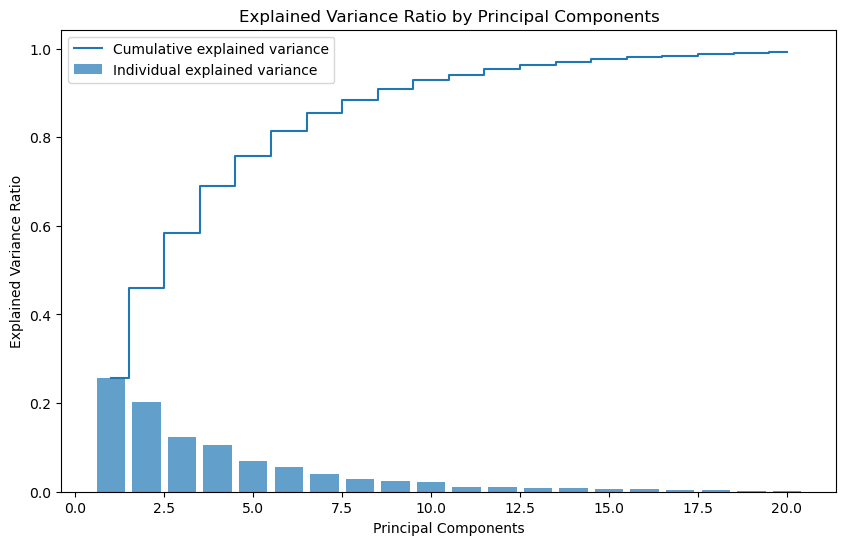

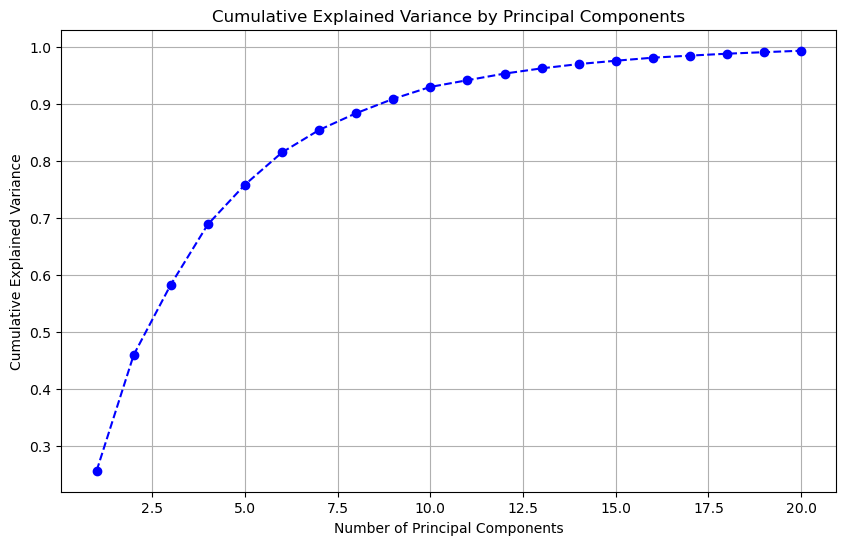

In [12]:
# Standardize the features. Exclude the target variable
X = df_hse06_stoich45_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with more components
n = 20
pca = PCA(n_components=n)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n)])

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

In [13]:
# Keeping 6 components

n_components = 6  # Choose based on the plot
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)  # X is your original feature matrix
X_pca_final.shape

(8354, 6)

Other methods

In [42]:
# Load dataset
X = df_hse06_stoich45_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45_for_pca['outputs.hse06.bandgap']

In [44]:
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=40).fit(X, y)  # Use RandomForestRegressor
rfe_selected = np.where(rfe.support_)[0]

Features remaining after Random Forest feature importance selection: 30 out of 45


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


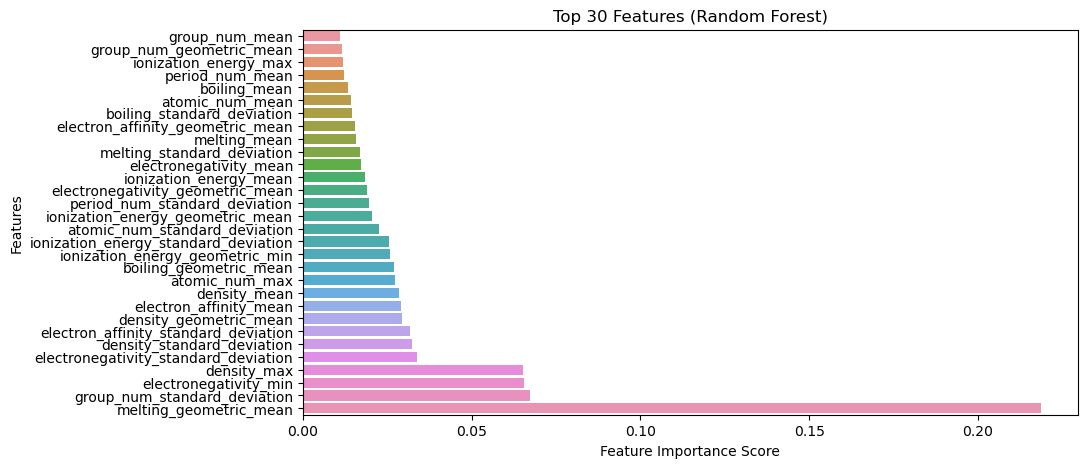

In [45]:
rf = RandomForestRegressor(n_estimators=100).fit(X, y)  # Use RandomForestRegressor
rf_importance = np.argsort(rf.feature_importances_)[-30:]  # Select top 30 features

print('Features remaining after Random Forest feature importance selection:', len(rf_importance), 'out of', X.shape[1])

# Feature Importance Plot (Random Forest)
plt.figure(figsize=(10, 5))
sns.barplot(x=rf.feature_importances_[rf_importance], y=[X.columns[i] for i in rf_importance])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 30 Features (Random Forest)")
plt.show()

In [46]:
lasso = Lasso(alpha=0.01).fit(X, y)  # Lasso works for regression
lasso_selected = np.argsort(abs(lasso.coef_))[-30:]

print('Features remaining after Lasso selection:', len(lasso_selected), 'out of', X.shape[1])

Features remaining after Lasso selection: 30 out of 45


/Users/simran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.517e+03, tolerance: 9.576e-01
  model = cd_fast.enet_coordinate_descent(


Original features: 45 features
Final selected features: 23 features


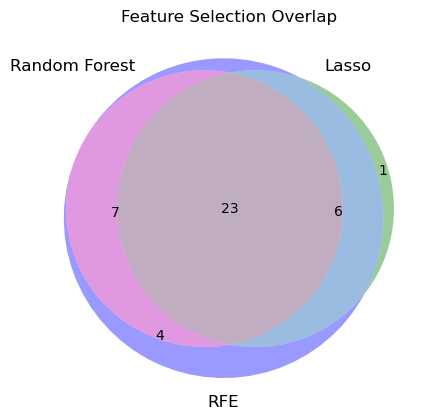

In [48]:
final_features = set(rf_importance) & set(lasso_selected) #& set(X_selected1) #& set(rfe_selected)  # Intersection
#final_features = set(rf_importance) | set(lasso_selected) | set(rfe_selected)  # Union

X_final = X.iloc[:, list(final_features)]
print(f"Original features: {X.shape[1]} features")
print(f"Final selected features: {X_final.shape[1]} features")

# Venn Diagram of Feature Selection Methods
plt.figure(figsize=(5, 5))
venn3([set(rf_importance), set(lasso_selected), set(rfe_selected)], 
      ('Random Forest', 'Lasso', 'RFE'))
plt.title("Feature Selection Overlap")
plt.show()

### HSE06 + Stoich120

In [14]:
# Merge the DataFrames on the matching columns
df_hse06_stoich120 = pd.merge(df_hse06, df_stoich120, left_on='qmof_id', right_on='MOF', how='right')

# Drop the 'MOF' column if it's no longer needed
df_hse06_stoich120.drop(columns=['qmof_id'], inplace=True)

# Drop the 'MOF' and 'inputs.*.theory' columns
# And columns that have the format 'info.*' in the column name
df_hse06_stoich120.drop(columns=['MOF', 'inputs.hse06.theory'], inplace=True)
df_hse06_stoich120.drop(columns=df_hse06_stoich120.filter(regex='info.*').columns, inplace=True)

# print column names and number of columns
print(df_hse06_stoich120.columns)
print('number of columns:', len(df_hse06_stoich120.columns))

# Print NaN values in the DataFrame
print(df_hse06_stoich120.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_stoich120_for_pca = df_hse06_stoich120.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_hse06_stoich120.shape[0] - df_hse06_stoich120_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_stoich120_for_pca.shape)

df_hse06_stoich120_for_pca

Index(['outputs.hse06.bandgap', 'H fraction', 'He fraction', 'Li fraction',
       'Be fraction', 'B fraction', 'C fraction', 'N fraction', 'O fraction',
       'F fraction',
       ...
       'range Electronegativity', 'mean Electronegativity',
       'avg s valence electrons', 'avg p valence electrons',
       'avg d valence electrons', 'avg f valence electrons',
       'frac s valence electrons', 'frac p valence electrons',
       'frac d valence electrons', 'frac f valence electrons'],
      dtype='object', length=136)
number of columns: 136
outputs.hse06.bandgap       11726
H fraction                      0
He fraction                     0
Li fraction                     0
Be fraction                     0
                            ...  
avg f valence electrons         0
frac s valence electrons        0
frac p valence electrons        0
frac d valence electrons        0
frac f valence electrons        0
Length: 136, dtype: int64
number of rows dropped: 11726
number of rows and

,outputs.hse06.bandgap,H fraction,He fraction,Li fraction,Be fraction,B fraction,C fraction,N fraction,O fraction,F fraction,...,range Electronegativity,mean Electronegativity,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,3.751390,0.480000,0,0.0,0.0,0.0,0.280000,0.080000,0.120000,0.0,...,1.54,2.502000,1.480000,1.280000,0.400000,0.0,0.468354,0.405063,0.126582,0.0
4,3.014584,0.050000,0,0.0,0.0,0.0,0.300000,0.200000,0.400000,0.0,...,2.62,2.900000,1.900000,2.800000,0.000000,0.0,0.404255,0.595745,0.000000,0.0
5,3.284171,0.318182,0,0.0,0.0,0.0,0.272727,0.136364,0.181818,0.0,...,1.79,2.627727,1.681818,1.863636,0.454545,0.0,0.420455,0.465909,0.113636,0.0
6,5.170849,0.437500,0,0.0,0.0,0.0,0.312500,0.000000,0.218750,0.0,...,1.75,2.564687,1.562500,1.500000,0.312500,0.0,0.462963,0.444444,0.092593,0.0
12,3.978235,0.390244,0,0.0,0.0,0.0,0.390244,0.097561,0.097561,0.0,...,1.56,2.531707,1.609756,1.463415,0.170732,0.0,0.496241,0.451128,0.052632,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,3.030492,0.235294,0,0.0,0.0,0.0,0.352941,0.235294,0.000000,0.0,...,1.26,2.616471,1.705882,2.000000,0.588235,0.0,0.397260,0.465753,0.136986,0.0
20366,4.483906,0.259259,0,0.0,0.0,0.0,0.222222,0.185185,0.222222,0.0,...,1.75,2.685185,1.740741,2.037037,0.740741,0.0,0.385246,0.450820,0.163934,0.0
20368,3.510606,0.258065,0,0.0,0.0,0.0,0.451613,0.193548,0.000000,0.0,...,1.35,2.528710,1.741935,1.741935,0.322581,0.0,0.457627,0.457627,0.084746,0.0
20370,4.055379,0.347826,0,0.0,0.0,0.0,0.434783,0.000000,0.173913,0.0,...,1.79,2.543913,1.652174,1.565217,0.434783,0.0,0.452381,0.428571,0.119048,0.0


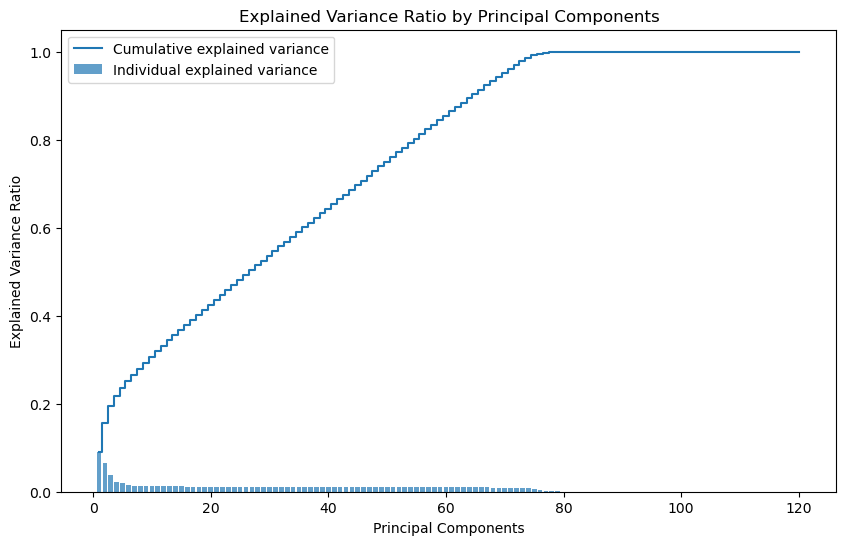

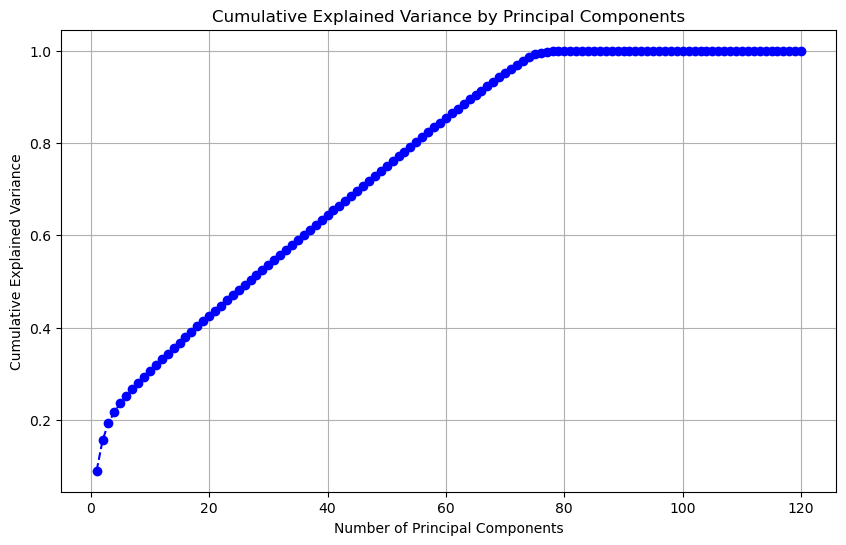

In [15]:
# Standardize the features. Exclude the target variable
X = df_hse06_stoich120_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich120_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with more components
n = 120
pca = PCA(n_components=n)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n)])

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

What is the meaning of this slope in variance?

the variance is distributed gradually across many principal components, rather than being dominated by a few. This means:
	
1. No clear “elbow” point – There’s no sharp drop-off in variance, so it’s harder to decide on a small subset of components.
2. Features are moderately important – Each principal component contributes somewhat equally, implying no single set of features dominates.
3. High dimensionality issue – If you keep too many components, your model may still suffer from unnecessary complexity and overfitting.


Use some other approaches for these features

In [ ]:
# Load dataset
X = df_hse06_stoich120_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich120_for_pca['outputs.hse06.bandgap']

Filter Methods (Statistical)


In [ ]:
var_thresh = VarianceThreshold(threshold=0.01).fit_transform(X)
print('Features remaining after variance thresholding:', var_thresh.shape[1], 'out of', X.shape[1])

Features remaining after variance thresholding: 11 out of 135


In [23]:
mi_selector = SelectKBest(mutual_info_regression, k=30).fit(X, y)  # Use mutual_info_regression
X_selected1 = X.iloc[:, mi_selector.get_support(indices=True)]
print('Features remaining after mutual information selection:', X_selected1.shape[1], 'out of', X.shape[1])

Features remaining after mutual information selection: 30 out of 135


Embedded Methods (Model-Based)


Features remaining after Random Forest feature importance selection: 30 out of 135


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


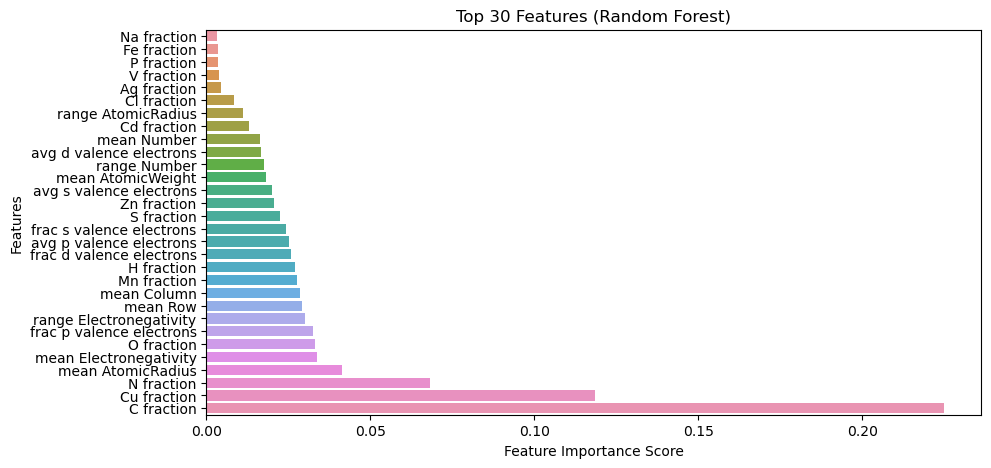

In [27]:
rf = RandomForestRegressor(n_estimators=100).fit(X, y)  # Use RandomForestRegressor
rf_importance = np.argsort(rf.feature_importances_)[-30:]  # Select top 30 features

print('Features remaining after Random Forest feature importance selection:', len(rf_importance), 'out of', X.shape[1])

# Feature Importance Plot (Random Forest)
plt.figure(figsize=(10, 5))
sns.barplot(x=rf.feature_importances_[rf_importance], y=[X.columns[i] for i in rf_importance])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 30 Features (Random Forest)")
plt.show()

In [24]:
lasso = Lasso(alpha=0.01).fit(X, y)  # Lasso works for regression
lasso_selected = np.argsort(abs(lasso.coef_))[-30:]

print('Features remaining after Lasso selection:', len(lasso_selected), 'out of', X.shape[1])

Features remaining after Lasso selection: 30 out of 135


Wrapper Methods (Optimization-Based) # This one can take a long time to run


In [ ]:
#rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=1).fit(X, y)  # Use RandomForestRegressor
#rfe_selected = np.where(rfe.support_)[0]

Combine Selections (Intersection or Union)


In [31]:
final_features = set(rf_importance) & set(lasso_selected) #& set(X_selected1) #& set(rfe_selected)  # Intersection
#final_features = set(rf_importance) | set(lasso_selected) | set(rfe_selected)  # Union

X_final = X.iloc[:, list(final_features)]
print(f"Original features: {X.shape[1]} features")
print(f"Final selected features: {X_final.shape[1]} features")

Original features: 135 features
Final selected features: 9 features


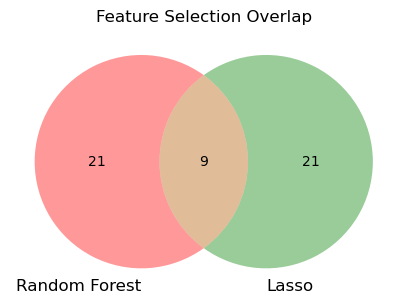

In [34]:
# Venn Diagram of Feature Selection Methods
plt.figure(figsize=(5, 5))
venn2([set(rf_importance), set(lasso_selected)],# set(rfe_selected)], 
      ('Random Forest', 'Lasso'))#, 'RFE'))
plt.title("Feature Selection Overlap")
plt.show()

### HSE06 + SCM

In [16]:
# Merge the DataFrames on the matching columns
df_hse06_scm = pd.merge(df_hse06, df_scm, left_on='qmof_id', right_on='MOF', how='right')

# Drop the 'MOF' column if it's no longer needed
df_hse06_scm.drop(columns=['qmof_id'], inplace=True)

# Drop the 'MOF' and 'inputs.*.theory' columns
# And columns that have the format 'info.*' in the column name
df_hse06_scm.drop(columns=['MOF', 'inputs.hse06.theory'], inplace=True)
df_hse06_scm.drop(columns=df_hse06_scm.filter(regex='info.*').columns, inplace=True)

# print column names and number of columns
print(df_hse06_scm.columns)
print('number of columns:', len(df_hse06_scm.columns))

# Print NaN values in the DataFrame
print(df_hse06_scm.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_scm_for_pca = df_hse06_scm.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_hse06_scm.shape[0] - df_hse06_scm_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_scm_for_pca.shape)

df_hse06_scm_for_pca

Index(['outputs.hse06.bandgap', 'sine coulomb matrix eig 0',
       'sine coulomb matrix eig 1', 'sine coulomb matrix eig 2',
       'sine coulomb matrix eig 3', 'sine coulomb matrix eig 4',
       'sine coulomb matrix eig 5', 'sine coulomb matrix eig 6',
       'sine coulomb matrix eig 7', 'sine coulomb matrix eig 8',
       ...
       'sine coulomb matrix eig 490', 'sine coulomb matrix eig 491',
       'sine coulomb matrix eig 492', 'sine coulomb matrix eig 493',
       'sine coulomb matrix eig 494', 'sine coulomb matrix eig 495',
       'sine coulomb matrix eig 496', 'sine coulomb matrix eig 497',
       'sine coulomb matrix eig 498', 'sine coulomb matrix eig 499'],
      dtype='object', length=501)
number of columns: 501
outputs.hse06.bandgap          11726
sine coulomb matrix eig 0          0
sine coulomb matrix eig 1          0
sine coulomb matrix eig 2          0
sine coulomb matrix eig 3          0
                               ...  
sine coulomb matrix eig 495        0
sine c

,outputs.hse06.bandgap,sine coulomb matrix eig 0,sine coulomb matrix eig 1,sine coulomb matrix eig 2,sine coulomb matrix eig 3,sine coulomb matrix eig 4,sine coulomb matrix eig 5,sine coulomb matrix eig 6,sine coulomb matrix eig 7,sine coulomb matrix eig 8,...,sine coulomb matrix eig 490,sine coulomb matrix eig 491,sine coulomb matrix eig 492,sine coulomb matrix eig 493,sine coulomb matrix eig 494,sine coulomb matrix eig 495,sine coulomb matrix eig 496,sine coulomb matrix eig 497,sine coulomb matrix eig 498,sine coulomb matrix eig 499
0,3.751390,1691.427298,1560.244952,137.059900,85.726398,76.930876,74.818457,66.357818,63.019537,60.947984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.014584,617.233971,564.388755,165.979086,0.404738,0.325928,91.008065,86.933901,80.051556,79.421213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.284171,1887.224612,1708.870884,1737.897955,1727.455277,437.599093,378.010318,384.302843,385.354507,164.750852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.170849,5478.960707,5370.757469,151.763275,105.995062,93.004869,78.567528,72.558656,72.161266,56.727937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,3.978235,1394.345388,1346.578231,164.613640,93.246490,91.440982,82.928096,82.428935,77.396471,72.878506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,3.030492,1683.625008,1559.747813,488.130430,431.607506,450.724403,426.725860,93.096160,71.848414,63.999185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20366,4.483906,5884.860969,5307.937595,5261.311974,5246.052274,430.567236,383.074964,148.823396,96.689495,78.968618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20368,3.510606,5491.599543,5360.338015,434.489913,386.066056,379.530046,373.158134,134.293029,89.975518,91.735923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20370,4.055379,1856.582131,1663.730055,142.494828,84.710420,79.326007,77.989694,69.592844,66.939837,67.815411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


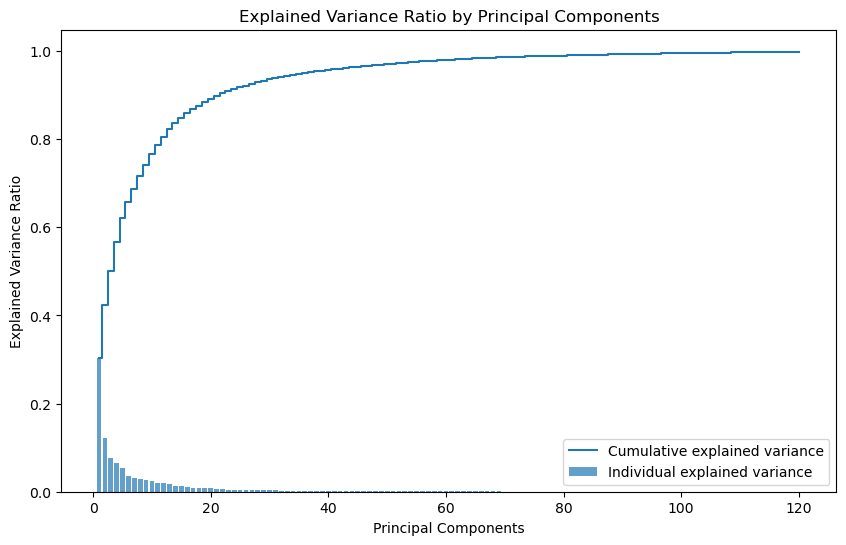

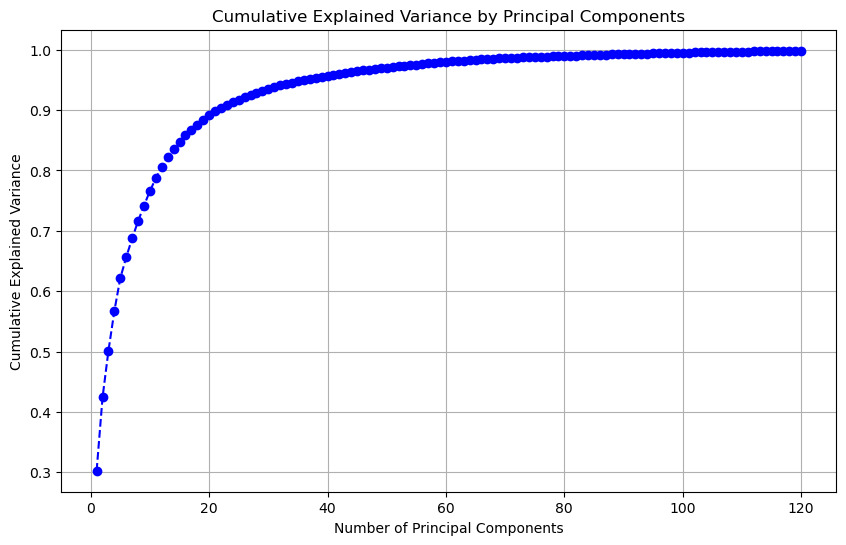

In [17]:
# Standardize the features. Exclude the target variable
X = df_hse06_scm_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_scm_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with more components
n = 120
pca = PCA(n_components=n)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n)])

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

In [18]:
# Keeping 30 components

n_components = 30  # Choose based on the plot
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)  # X is your original feature matrix
X_pca_final.shape

(8648, 30)

Other methods

In [49]:
# Load dataset
X = df_hse06_scm_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_scm_for_pca['outputs.hse06.bandgap']

In [50]:
var_thresh = VarianceThreshold(threshold=0.01).fit_transform(X)
print('Features remaining after variance thresholding:', var_thresh.shape[1], 'out of', X.shape[1])

Features remaining after variance thresholding: 144 out of 500


In [51]:
mi_selector = SelectKBest(mutual_info_regression, k=30).fit(X, y)  # Use mutual_info_regression
X_selected1 = X.iloc[:, mi_selector.get_support(indices=True)]
print('Features remaining after mutual information selection:', X_selected1.shape[1], 'out of', X.shape[1])

Features remaining after mutual information selection: 30 out of 500


Features remaining after Random Forest feature importance selection: 30 out of 500


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


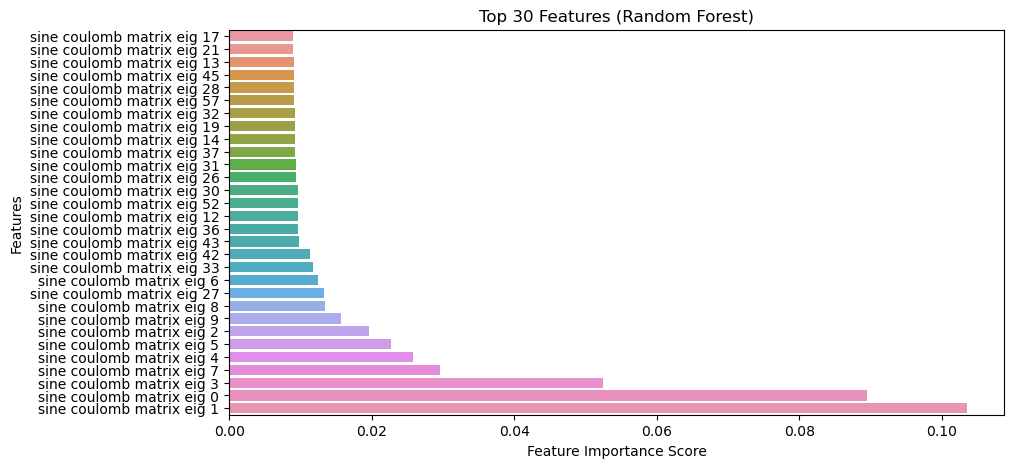

In [52]:
rf = RandomForestRegressor(n_estimators=100).fit(X, y)  # Use RandomForestRegressor
rf_importance = np.argsort(rf.feature_importances_)[-30:]  # Select top 30 features

print('Features remaining after Random Forest feature importance selection:', len(rf_importance), 'out of', X.shape[1])

# Feature Importance Plot (Random Forest)
plt.figure(figsize=(10, 5))
sns.barplot(x=rf.feature_importances_[rf_importance], y=[X.columns[i] for i in rf_importance])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 30 Features (Random Forest)")
plt.show()

In [53]:
lasso = Lasso(alpha=0.01).fit(X, y)  # Lasso works for regression
lasso_selected = np.argsort(abs(lasso.coef_))[-30:]

print('Features remaining after Lasso selection:', len(lasso_selected), 'out of', X.shape[1])

Features remaining after Lasso selection: 30 out of 500


/Users/simran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.204e+03, tolerance: 9.825e-01
  model = cd_fast.enet_coordinate_descent(


Original features: 500 features
Final selected features: 4 features


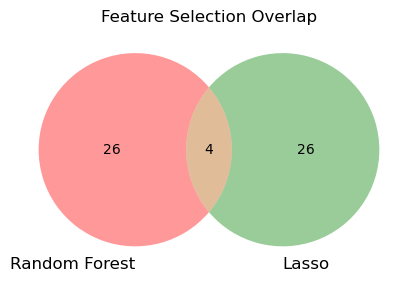

In [54]:
final_features = set(rf_importance) & set(lasso_selected) #& set(X_selected1) #& set(rfe_selected)  # Intersection
#final_features = set(rf_importance) | set(lasso_selected) | set(rfe_selected)  # Union

X_final = X.iloc[:, list(final_features)]
print(f"Original features: {X.shape[1]} features")
print(f"Final selected features: {X_final.shape[1]} features")

# Venn Diagram of Feature Selection Methods
plt.figure(figsize=(5, 5))
venn2([set(rf_importance), set(lasso_selected)],# set(rfe_selected)], 
      ('Random Forest', 'Lasso'))#, 'RFE'))
plt.title("Feature Selection Overlap")
plt.show()

In [55]:
final_features

{26, 27, 52, 57}

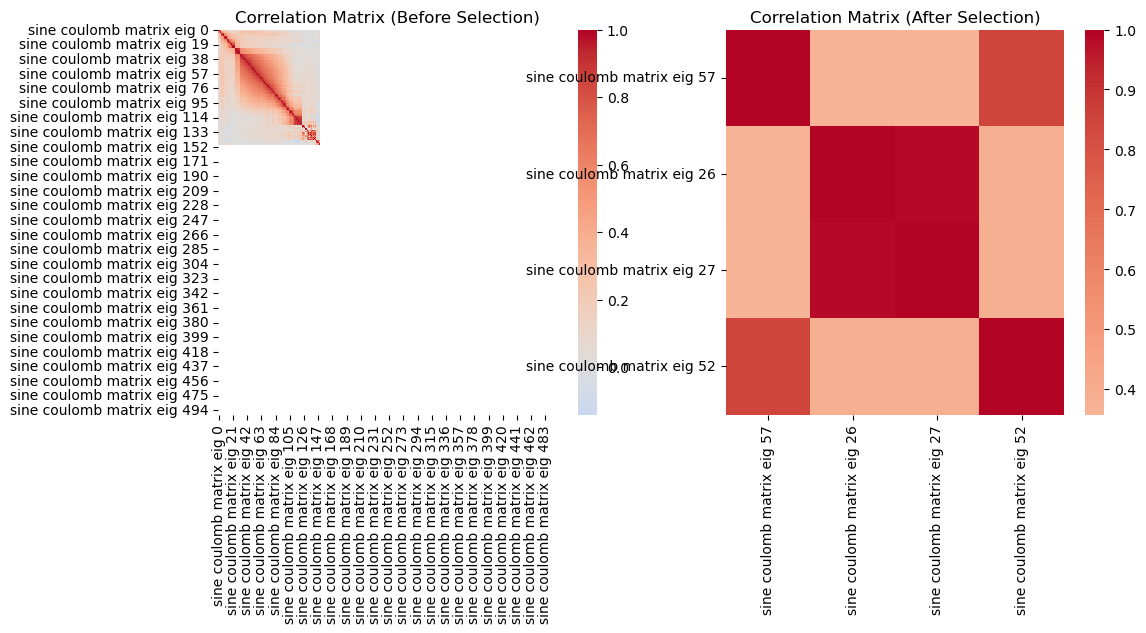

In [56]:
# Heatmap of Feature Correlations (Before & After Selection)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Before Selection)")

plt.subplot(1, 2, 2)
sns.heatmap(X_final.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix (After Selection)")
plt.show()

### HSE06 + OFM

In [19]:
# Merge the DataFrames on the matching columns
df_hse06_ofm = pd.merge(df_hse06, df_ofm, left_on='qmof_id', right_on='MOF', how='right')

# Drop the 'MOF' column if it's no longer needed
df_hse06_ofm.drop(columns=['qmof_id'], inplace=True)

# Drop the 'MOF' and 'inputs.*.theory' columns
# And columns that have the format 'info.*' in the column name
df_hse06_ofm.drop(columns=['MOF', 'inputs.hse06.theory'], inplace=True)
df_hse06_ofm.drop(columns=df_hse06_ofm.filter(regex='info.*').columns, inplace=True)

# print column names and number of columns
print(df_hse06_ofm.columns)
print('number of columns:', len(df_hse06_ofm.columns))

# Print NaN values in the DataFrame
print(df_hse06_ofm.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_ofm_for_pca = df_hse06_ofm.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_hse06_ofm.shape[0] - df_hse06_ofm_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_ofm_for_pca.shape)

df_hse06_ofm_for_pca

Index(['outputs.hse06.bandgap', 'OFM: s^1 - s^1', 'OFM: s^1 - s^2',
       'OFM: s^1 - p^1', 'OFM: s^1 - p^2', 'OFM: s^1 - p^3', 'OFM: s^1 - p^4',
       'OFM: s^1 - p^5', 'OFM: s^1 - p^6', 'OFM: s^1 - d^1',
       ...
       'OFM: period 7 - f^12', 'OFM: period 7 - f^13', 'OFM: period 7 - f^14',
       'OFM: period 7 - period 1', 'OFM: period 7 - period 2',
       'OFM: period 7 - period 3', 'OFM: period 7 - period 4',
       'OFM: period 7 - period 5', 'OFM: period 7 - period 6',
       'OFM: period 7 - period 7'],
      dtype='object', length=1522)
number of columns: 1522
outputs.hse06.bandgap       11726
OFM: s^1 - s^1                  0
OFM: s^1 - s^2                  0
OFM: s^1 - p^1                  0
OFM: s^1 - p^2                  0
                            ...  
OFM: period 7 - period 3        0
OFM: period 7 - period 4        0
OFM: period 7 - period 5        0
OFM: period 7 - period 6        0
OFM: period 7 - period 7        0
Length: 1522, dtype: int64
number of rows dr

,outputs.hse06.bandgap,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^1,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^5,OFM: s^1 - p^6,OFM: s^1 - d^1,...,OFM: period 7 - f^12,OFM: period 7 - f^13,OFM: period 7 - f^14,OFM: period 7 - period 1,OFM: period 7 - period 2,OFM: period 7 - period 3,OFM: period 7 - period 4,OFM: period 7 - period 5,OFM: period 7 - period 6,OFM: period 7 - period 7
0,3.751390,0.223047,0.332186,0.0,0.209774,0.060009,0.056113,0.000000,0.006290,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.014584,0.000733,0.085154,0.0,0.003905,0.004421,0.076828,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.284171,0.059689,0.252440,0.0,0.077076,0.016781,0.157252,0.000000,0.001331,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.170849,0.133135,0.310263,0.0,0.141747,0.000000,0.167516,0.000000,0.001001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,3.978235,0.108810,0.266463,0.0,0.214648,0.015968,0.034951,0.000000,0.000896,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,3.030492,0.027015,0.232063,0.0,0.130370,0.064528,0.000000,0.032044,0.005121,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20366,4.483906,0.050464,0.207679,0.0,0.082251,0.037644,0.083701,0.000000,0.004082,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20368,3.510606,0.028616,0.197215,0.0,0.148281,0.033346,0.014910,0.000000,0.000678,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20370,4.055379,0.136050,0.223271,0.0,0.198331,0.000000,0.024940,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


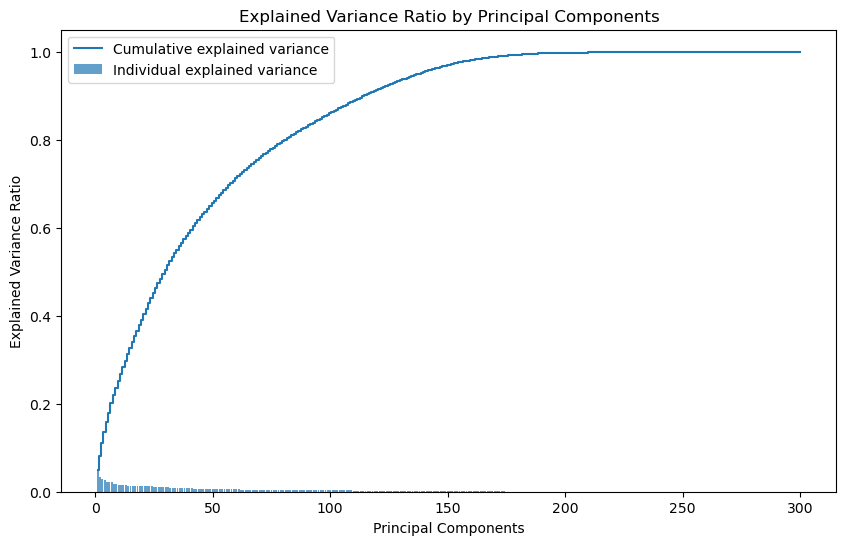

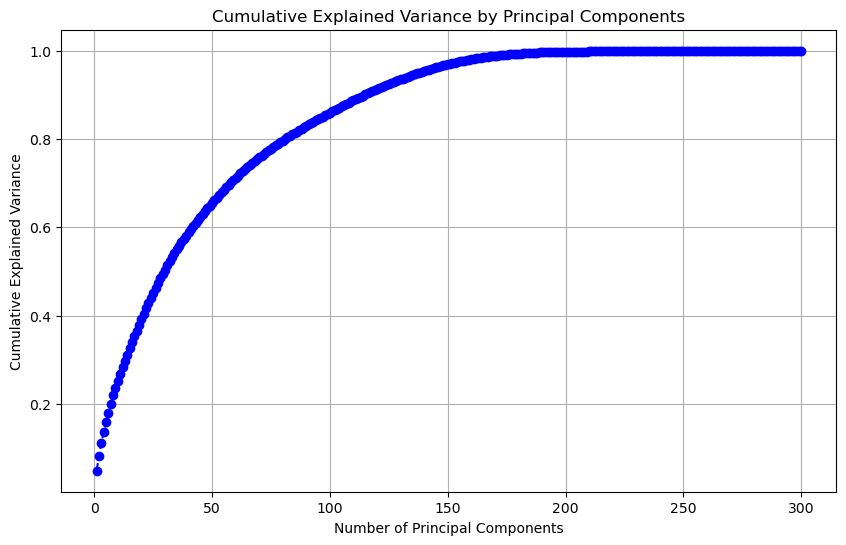

In [20]:
# Standardize the features. Exclude the target variable
X = df_hse06_ofm_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_ofm_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with more components
n = 300
pca = PCA(n_components=n)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n)])

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

In [32]:
# Keeping 30 components

n_components = 100  # Choose based on the plot
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)  # X is your original feature matrix
X_pca_final.shape

(8648, 100)

Other methods

In [57]:
# Load dataset
X = df_hse06_ofm_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_ofm_for_pca['outputs.hse06.bandgap']

In [58]:
var_thresh = VarianceThreshold(threshold=0.01).fit_transform(X)
print('Features remaining after variance thresholding:', var_thresh.shape[1], 'out of', X.shape[1])

Features remaining after variance thresholding: 4 out of 1521


In [59]:
mi_selector = SelectKBest(mutual_info_regression, k=30).fit(X, y)  # Use mutual_info_regression
X_selected1 = X.iloc[:, mi_selector.get_support(indices=True)]
print('Features remaining after mutual information selection:', X_selected1.shape[1], 'out of', X.shape[1])

Features remaining after mutual information selection: 30 out of 1521


Features remaining after Random Forest feature importance selection: 30 out of 1521


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


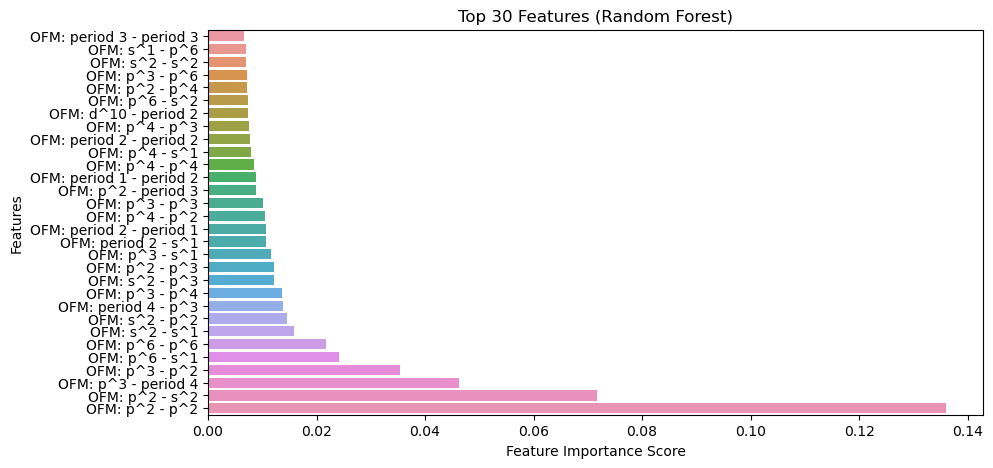

In [60]:
rf = RandomForestRegressor(n_estimators=100).fit(X, y)  # Use RandomForestRegressor
rf_importance = np.argsort(rf.feature_importances_)[-30:]  # Select top 30 features

print('Features remaining after Random Forest feature importance selection:', len(rf_importance), 'out of', X.shape[1])

# Feature Importance Plot (Random Forest)
plt.figure(figsize=(10, 5))
sns.barplot(x=rf.feature_importances_[rf_importance], y=[X.columns[i] for i in rf_importance])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 30 Features (Random Forest)")
plt.show()

In [61]:
lasso = Lasso(alpha=0.01).fit(X, y)  # Lasso works for regression
lasso_selected = np.argsort(abs(lasso.coef_))[-30:]

print('Features remaining after Lasso selection:', len(lasso_selected), 'out of', X.shape[1])

Features remaining after Lasso selection: 30 out of 1521


In [40]:
final_features = set(rf_importance) & set(lasso_selected) #& set(X_selected1) #& set(rfe_selected)  # Intersection
#final_features = set(rf_importance) | set(lasso_selected) | set(rfe_selected)  # Union

X_final = X.iloc[:, list(final_features)]
print(f"Original features: {X.shape[1]} features")
print(f"Final selected features: {X_final.shape[1]} features")

Original features: 1521 features
Final selected features: 2 features


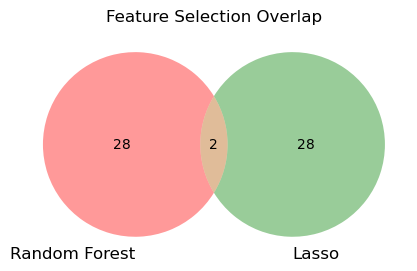

In [41]:
# Venn Diagram of Feature Selection Methods
plt.figure(figsize=(5, 5))
venn2([set(rf_importance), set(lasso_selected)],# set(rfe_selected)], 
      ('Random Forest', 'Lasso'))#, 'RFE'))
plt.title("Feature Selection Overlap")
plt.show()

## Combinations of feature datasets

### HSE06 + Stoich45 + Stoich120

In [ ]:
# Merge the 3 DataFrames on the matching columns
df_stoich45_stoich120 = pd.merge(df_stoich45, df_stoich120, left_on='MOF', right_on='MOF', how='right')
df_hse06_stoich45_stoich120 = pd.merge(df_hse06, df_stoich45_stoich120, left_on='qmof_id', right_on='MOF', how='right')

# Drop the 'MOF' column if it's no longer needed
df_hse06_stoich45_stoich120.drop(columns=['qmof_id'], inplace=True)

# Display the combined DataFrame
df_hse06_stoich45_stoich120.columns

Index(['inputs.hse06.theory', 'outputs.hse06.bandgap',
       'info.mofid.smiles_nodes', 'info.mofid.smiles_linkers',
       'info.mofid.smiles', 'info.natoms', 'info.pld', 'info.lcd',
       'info.density', 'info.volume',
       ...
       'range Electronegativity', 'mean Electronegativity',
       'avg s valence electrons', 'avg p valence electrons',
       'avg d valence electrons', 'avg f valence electrons',
       'frac s valence electrons', 'frac p valence electrons',
       'frac d valence electrons', 'frac f valence electrons'],
      dtype='object', length=191)

In [11]:
# Drop the 'MOF' and 'inputs.*.theory' columns
# And columns that have the format 'info.*' in the column name
df_hse06_stoich45_stoich120.drop(columns=['MOF', 'inputs.hse06.theory'], inplace=True)
df_hse06_stoich45_stoich120.drop(columns=df_hse06_stoich45_stoich120.filter(regex='info.*').columns, inplace=True)

# print column names and number of columns
print(df_hse06_stoich45_stoich120.columns)
print('number of columns:', len(df_hse06_stoich45_stoich120.columns))

Index(['outputs.hse06.bandgap', 'atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max',
       ...
       'range Electronegativity', 'mean Electronegativity',
       'avg s valence electrons', 'avg p valence electrons',
       'avg d valence electrons', 'avg f valence electrons',
       'frac s valence electrons', 'frac p valence electrons',
       'frac d valence electrons', 'frac f valence electrons'],
      dtype='object', length=181)
number of columns: 181


In [12]:
# Print NaN values in the DataFrame
print(df_hse06_stoich45_stoich120.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_stoich45_stoich120_for_pca = df_hse06_stoich45_stoich120.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_hse06_stoich45_stoich120.shape[0] - df_hse06_stoich45_stoich120_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_stoich45_stoich120_for_pca.shape)

df_hse06_stoich45_stoich120_for_pca.columns

outputs.hse06.bandgap            11726
atomic_num_mean                      0
atomic_num_geometric_mean            0
atomic_num_standard_deviation        0
atomic_num_max                       0
                                 ...  
avg f valence electrons              0
frac s valence electrons             0
frac p valence electrons             0
frac d valence electrons             0
frac f valence electrons             0
Length: 181, dtype: int64
number of rows dropped: 12020
number of rows and columns after dropping NaNs: (8354, 181)


Index(['outputs.hse06.bandgap', 'atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max',
       ...
       'range Electronegativity', 'mean Electronegativity',
       'avg s valence electrons', 'avg p valence electrons',
       'avg d valence electrons', 'avg f valence electrons',
       'frac s valence electrons', 'frac p valence electrons',
       'frac d valence electrons', 'frac f valence electrons'],
      dtype='object', length=181)

In [13]:
df_hse06_stoich45_stoich120_for_pca

,outputs.hse06.bandgap,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,range Electronegativity,mean Electronegativity,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,3.751390,4.840000,2.833720,5.689851,29.0,1.0,7.960000,3.991657,6.749696,16.0,...,1.54,2.502000,1.480000,1.280000,0.400000,0.0,0.468354,0.405063,0.126582,0.0
4,3.014584,7.400000,6.724170,3.088689,19.0,1.0,13.700000,11.500180,4.313931,16.0,...,2.62,2.900000,1.900000,2.800000,0.000000,0.0,0.404255,0.595745,0.000000,0.0
5,3.284171,6.454545,4.107111,6.272068,30.0,1.0,10.363636,6.247033,6.463502,16.0,...,1.79,2.627727,1.681818,1.863636,0.454545,0.0,0.420455,0.465909,0.113636,0.0
6,5.170849,5.562500,3.113594,8.169828,48.0,1.0,8.687500,4.521585,6.834826,16.0,...,1.75,2.564687,1.562500,1.500000,0.312500,0.0,0.462963,0.444444,0.092593,0.0
12,3.978235,4.853659,3.229498,4.436880,27.0,1.0,9.097561,5.043818,6.558572,16.0,...,1.56,2.531707,1.609756,1.463415,0.170732,0.0,0.496241,0.451128,0.052632,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,3.030492,7.705882,5.061396,6.968540,29.0,1.0,11.352941,7.713655,5.880588,17.0,...,1.26,2.616471,1.705882,2.000000,0.588235,0.0,0.397260,0.465753,0.136986,0.0
20366,4.483906,8.814815,5.003135,11.575955,48.0,1.0,11.185185,7.321641,6.116384,16.0,...,1.75,2.685185,1.740741,2.037037,0.740741,0.0,0.385246,0.450820,0.163934,0.0
20368,3.510606,6.903226,4.435160,8.317703,48.0,1.0,10.903226,7.206663,5.882477,16.0,...,1.35,2.528710,1.741935,1.741935,0.322581,0.0,0.457627,0.457627,0.084746,0.0
20370,4.055379,5.652174,3.627508,5.857798,30.0,1.0,9.739130,5.683942,6.441829,16.0,...,1.79,2.543913,1.652174,1.565217,0.434783,0.0,0.452381,0.428571,0.119048,0.0


#### PCA 

In [15]:
# Standardize the features. Exclude the target variable
X = df_hse06_stoich45_stoich120_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45_stoich120_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

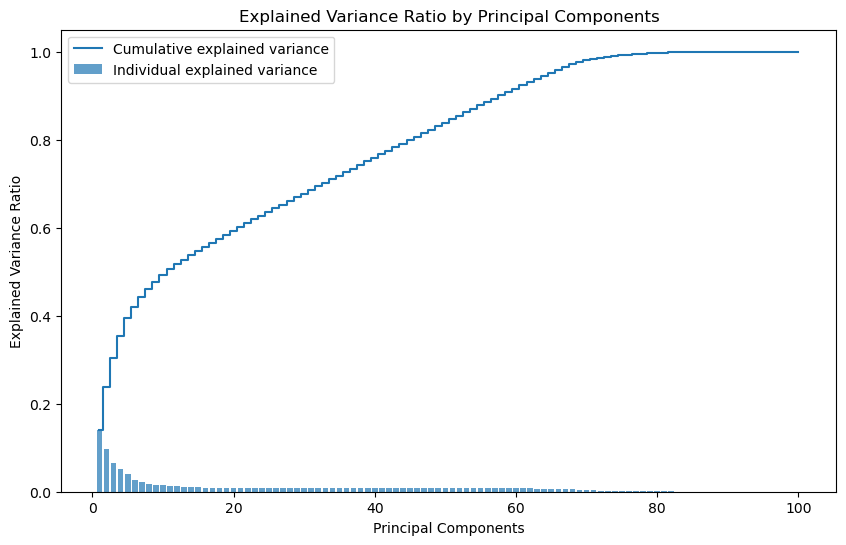

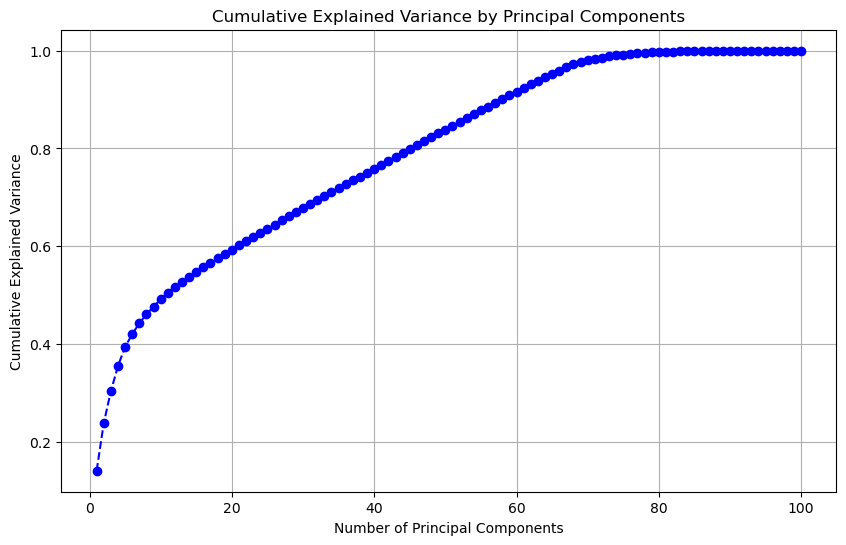

In [16]:
# Perform PCA with more components
n = 100
pca = PCA(n_components=n)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n)])

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

### HSE06 + Stoich45 + SCM

Import features from the features datasets to DFT dataset by matching qmof_id in each

In [6]:
# Merge the DataFrames on the matching columns
df_stoich45_scm = pd.merge(df_stoich45, df_scm, left_on='MOF', right_on='MOF', how='right')
df_hse06_stoich45_scm = pd.merge(df_hse06, df_stoich45_scm, left_on='qmof_id', right_on='MOF', how='right')

# Drop the 'MOF' column if it's no longer needed
df_hse06_stoich45_scm.drop(columns=['qmof_id'], inplace=True)

# Display the combined DataFrame
df_hse06_stoich45_scm.columns

Index(['inputs.hse06.theory', 'outputs.hse06.bandgap',
       'info.mofid.smiles_nodes', 'info.mofid.smiles_linkers',
       'info.mofid.smiles', 'info.natoms', 'info.pld', 'info.lcd',
       'info.density', 'info.volume',
       ...
       'sine coulomb matrix eig 490', 'sine coulomb matrix eig 491',
       'sine coulomb matrix eig 492', 'sine coulomb matrix eig 493',
       'sine coulomb matrix eig 494', 'sine coulomb matrix eig 495',
       'sine coulomb matrix eig 496', 'sine coulomb matrix eig 497',
       'sine coulomb matrix eig 498', 'sine coulomb matrix eig 499'],
      dtype='object', length=556)

Remove redundant columns and nan values if any

In [7]:
# Drop the 'MOF' and 'inputs.*.theory' columns
# And columns that have the format 'info.*' in the column name
df_hse06_stoich45_scm.drop(columns=['MOF', 'inputs.hse06.theory'], inplace=True)
df_hse06_stoich45_scm.drop(columns=df_hse06_stoich45_scm.filter(regex='info.*').columns, inplace=True)

# print column names and number of columns
print(df_hse06_stoich45_scm.columns)
print('number of columns:', len(df_hse06_stoich45_scm.columns))

Index(['outputs.hse06.bandgap', 'atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max',
       ...
       'sine coulomb matrix eig 490', 'sine coulomb matrix eig 491',
       'sine coulomb matrix eig 492', 'sine coulomb matrix eig 493',
       'sine coulomb matrix eig 494', 'sine coulomb matrix eig 495',
       'sine coulomb matrix eig 496', 'sine coulomb matrix eig 497',
       'sine coulomb matrix eig 498', 'sine coulomb matrix eig 499'],
      dtype='object', length=546)
number of columns: 546


In [8]:
# Print NaN values in the DataFrame
print(df_hse06_stoich45_scm.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_stoich45_scm_for_pca = df_hse06_stoich45_scm.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_hse06_stoich45_scm.shape[0] - df_hse06_stoich45_scm_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_stoich45_scm_for_pca.shape)

df_hse06_stoich45_scm_for_pca.columns

outputs.hse06.bandgap            11726
atomic_num_mean                      0
atomic_num_geometric_mean            0
atomic_num_standard_deviation        0
atomic_num_max                       0
                                 ...  
sine coulomb matrix eig 495          0
sine coulomb matrix eig 496          0
sine coulomb matrix eig 497          0
sine coulomb matrix eig 498          0
sine coulomb matrix eig 499          0
Length: 546, dtype: int64
number of rows dropped: 12020
number of rows and columns after dropping NaNs: (8354, 546)


Index(['outputs.hse06.bandgap', 'atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max',
       ...
       'sine coulomb matrix eig 490', 'sine coulomb matrix eig 491',
       'sine coulomb matrix eig 492', 'sine coulomb matrix eig 493',
       'sine coulomb matrix eig 494', 'sine coulomb matrix eig 495',
       'sine coulomb matrix eig 496', 'sine coulomb matrix eig 497',
       'sine coulomb matrix eig 498', 'sine coulomb matrix eig 499'],
      dtype='object', length=546)

In [9]:
df_hse06_stoich45_scm_for_pca

,outputs.hse06.bandgap,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,sine coulomb matrix eig 490,sine coulomb matrix eig 491,sine coulomb matrix eig 492,sine coulomb matrix eig 493,sine coulomb matrix eig 494,sine coulomb matrix eig 495,sine coulomb matrix eig 496,sine coulomb matrix eig 497,sine coulomb matrix eig 498,sine coulomb matrix eig 499
0,3.751390,4.840000,2.833720,5.689851,29.0,1.0,7.960000,3.991657,6.749696,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.014584,7.400000,6.724170,3.088689,19.0,1.0,13.700000,11.500180,4.313931,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.284171,6.454545,4.107111,6.272068,30.0,1.0,10.363636,6.247033,6.463502,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.170849,5.562500,3.113594,8.169828,48.0,1.0,8.687500,4.521585,6.834826,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,3.978235,4.853659,3.229498,4.436880,27.0,1.0,9.097561,5.043818,6.558572,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,3.030492,7.705882,5.061396,6.968540,29.0,1.0,11.352941,7.713655,5.880588,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20366,4.483906,8.814815,5.003135,11.575955,48.0,1.0,11.185185,7.321641,6.116384,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20368,3.510606,6.903226,4.435160,8.317703,48.0,1.0,10.903226,7.206663,5.882477,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20370,4.055379,5.652174,3.627508,5.857798,30.0,1.0,9.739130,5.683942,6.441829,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####  PCA

In [10]:
# PCA analysis
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the features. Exclude the target variable
X = df_hse06_stoich45_scm_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45_scm_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

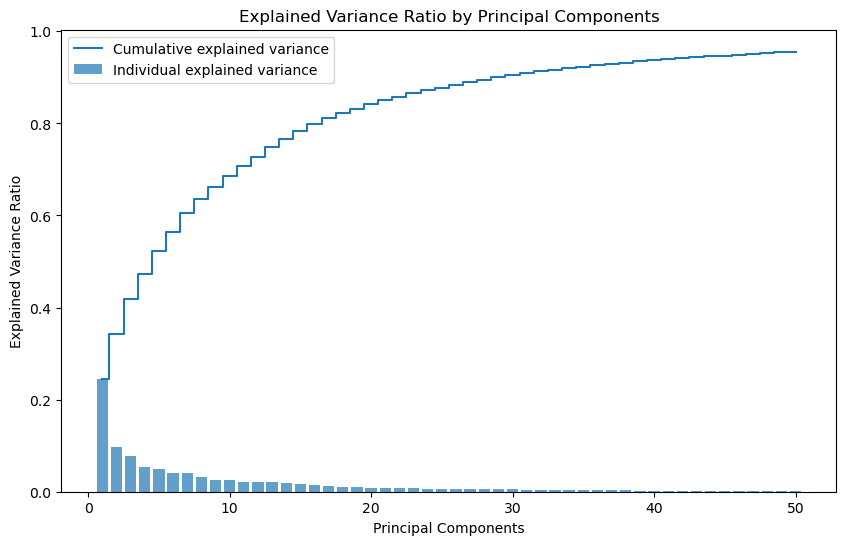

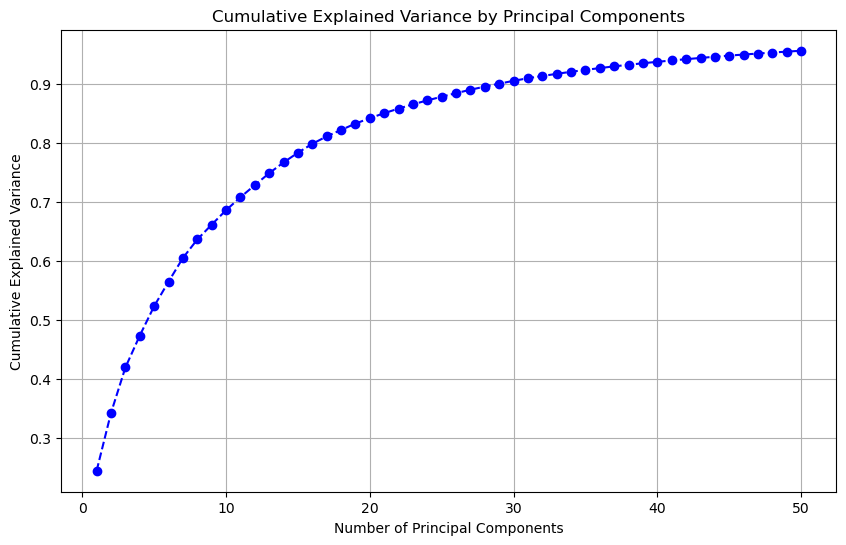

In [11]:
# Perform PCA with more components
n = 50
pca = PCA(n_components=n)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n)])

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

In [12]:
n_components = 30  # Choose based on the plot
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)  # X is your original feature matrix
X_pca_final.shape

(8354, 30)